In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=10000,
                           n_features=20,
                           n_informative=15,
                           flip_y=.5, weights=[.2, .8])

In [4]:
# Need to:
#  1. Create training/test sets.
#  2. Fit a baseline Random Forest to evaluate naive algorithm.
#  3. Alter parameters to see how fit improves.

In [5]:
import numpy as np
training = np.random.choice([True, False], p=[.8, .2],
                            size=y.shape)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf = RandomForestClassifier()

In [8]:
rf.fit(X[training], y[training])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
preds = rf.predict(X[~training])

In [10]:
print "Accuracy:\t", (preds == y[~training]).mean()

Accuracy:	0.664011946242


In [12]:
# accuracy is a good metrics but a confusion matrix will help
# understand what's going on.
# Iterate through the recommended choices for max_features and
# see what it does to the fit. Also, try iterating through a
# couple of floats which are the fraction of the features that
# will be used.

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
max_feature_params = ['auto', 'sqrt', 'log2', .01, .5, .99]

In [28]:
confusion_matricies = {}
for max_feature in max_feature_params:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(X[training], y[training])
    preds = rf.predict(X[~training])
    confusion_matricies[max_feature] = confusion_matrix(y[~training], preds).ravel()

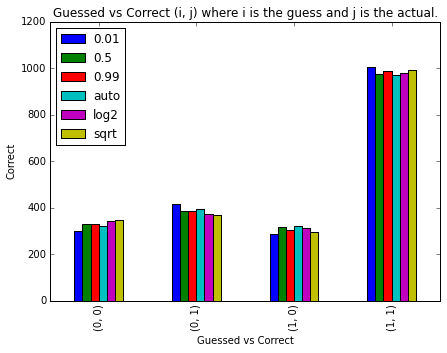

In [30]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

confusion_df = pd.DataFrame(confusion_matricies)

f, ax = plt.subplots(figsize=(7,5))
confusion_df.plot(kind='bar', ax=ax)

ax.legend(loc='best')
ax.set_title('Guessed vs Correct (i, j) where i is the guess and j is the actual.')
ax.grid()
ax.set_xticklabels([str((i,j)) for i, j in
                    list(itertools.product(range(2), range(2)))])

ax.set_xlabel("Guessed vs Correct")
ax.set_ylabel('Correct')

In [34]:
n_estimator_params = range(1, 20)
confusion_matricies = {}

accuracy = lambda x: np.trace(x) / np.sum(x, dtype=float)

for n_estimator in n_estimator_params:
    rf = RandomForestClassifier(n_estimators=n_estimator)
    rf.fit(X[training], y[training])
    preds = rf.predict(X[~training])
    val = confusion_matrix(y[~training],
                           preds)
    
    confusion_matricies[n_estimator] = accuracy(val)
    
accuracy_series = pd.Series(confusion_matricies)
    

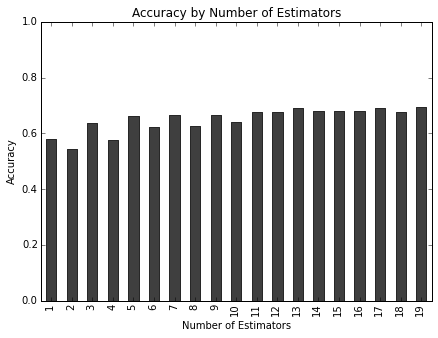

In [35]:
f, ax = plt.subplots(figsize=(7,5))
accuracy_series.plot(kind='bar', ax=ax, color='k', alpha=.75)
ax.grid()

ax.set_title("Accuracy by Number of Estimators")
ax.set_ylim(0, 1)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Estimators')

In [36]:
rf = RandomForestClassifier(n_jobs=4, verbose=True)
rf.fit(X, y)

[Parallel(n_jobs=4)]: Done   1 out of  10 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [37]:
rf.predict(X)

[Parallel(n_jobs=4)]: Done   1 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


array([0, 1, 1, ..., 1, 1, 1])